<a href="https://colab.research.google.com/github/paigeclark0615/MAT494/blob/main/Hmwk2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

In [2]:
# generate an independent variable 
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-16.023339
1,-9.595960,-18.551472
2,-9.191919,-24.921784
3,-8.787879,-18.880223
4,-8.383838,-11.191273


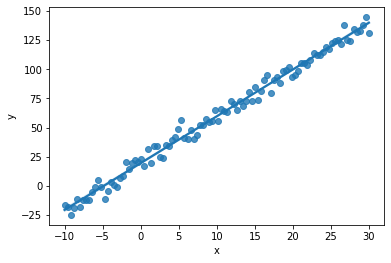

In [3]:
sns.regplot(x='x', y='y', data = df)
plt.show()

In [6]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8823.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           8.08e-98
Time:                        00:45:34   Log-Likelihood:                -301.48
No. Observations:                 100   AIC:                             607.0
Df Residuals:                      98   BIC:                             612.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4488      0.656     29.632      0.000      18.146      20.751
x              4.0129      0.043     93.930      0.000       3.928       4.098
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.320
Skew:                           0.280   Prob(JB):                        0.517
Kurtosis:                       3.060   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
res = model.resid
standard_dev = np.std(res)
standard_dev

4.93258684836279

In [8]:
# MLE function
# ml modeling and neg LL calculation
def MLE_Norm(parameters):
  # extract parameters
  const, beta, std_dev = parameters
  # predict the output
  pred = const + beta*x
  # Calculate the log-likelihood for normal distribution
  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  # Calculate the negative log-likelihood
  neg_LL = -1*LL
  return neg_LL

In [9]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: 301.4802099336538
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.13686828e-05, 4.54747354e-05, 1.70530258e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 128
      nit: 27
     njev: 32
   status: 0
  success: True
        x: array([19.44881913,  4.01286657,  4.93258823])